<a href="https://colab.research.google.com/github/l9x3/Hello_World/blob/master/clean_fPCG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

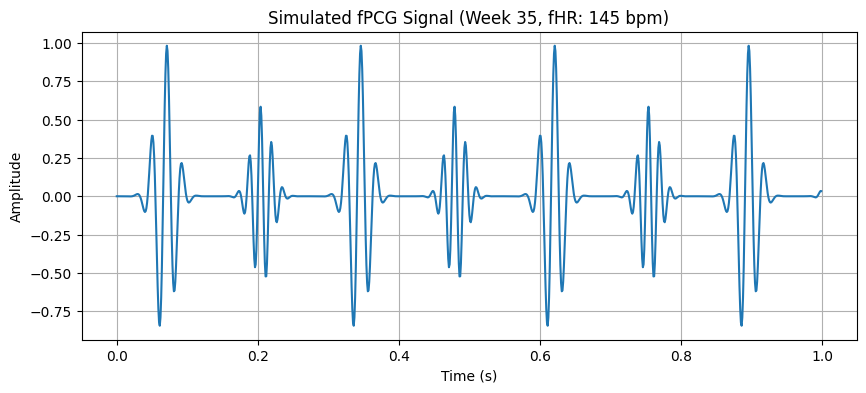

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal.windows import gaussian # Import gaussian from scipy.signal.windows
import random
import soundfile as sf

# Define simulation parameters
duration = 60  # seconds
fs = 1000  # Sampling frequency in Hz
t = np.linspace(0, duration, duration * fs)  # Time vector

# Define center frequencies for S1 and S2 for each week
center_freqs = {
    34: {'S1': 53.55, 'S2': 65.64},
    35: {'S1': 45.44, 'S2': 63.37},
    36: {'S1': 41.59, 'S2': 59.25},
    37: {'S1': 39.39, 'S2': 57.94},
    38: {'S1': 37.91, 'S2': 56.64}
}

# Choose a random gestational week
week = random.choice(list(center_freqs.keys()))
freq_S1 = center_freqs[week]['S1']
freq_S2 = center_freqs[week]['S2']

# Generate random fetal heart rate in bpm
fHR = random.randint(110, 160)
inter_distance = (210 - 0.5 * fHR) / 1000  # Convert ms to seconds
s1_ratio = 1.70

# Function to generate a Gaussian-modulated sinusoid
def generate_gaussian_sinusoid(freq, duration, fs, amp=1.0):
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    gauss_env = np.exp(-0.5 * ((t - duration/2) / (duration/10))**2)
    return amp * gauss_env * np.sin(2 * np.pi * freq * t)

# Generate fPCG signal
signal = np.zeros_like(t)
time = 0
while time < duration:
    s1_wave = generate_gaussian_sinusoid(freq_S1, inter_distance, fs, amp=1.0)
    s2_wave = generate_gaussian_sinusoid(freq_S2, inter_distance, fs, amp=1.0/s1_ratio)
    start_idx = int(time * fs)
    if start_idx + len(s1_wave) < len(signal):
        signal[start_idx:start_idx+len(s1_wave)] += s1_wave
    time += inter_distance
    start_idx = int(time * fs)
    if start_idx + len(s2_wave) < len(signal):
        signal[start_idx:start_idx+len(s2_wave)] += s2_wave
    time += inter_distance

# Save the signal as a WAV file
sf.write("simulated_fpcg.wav", signal, fs)

# Plot the simulated fPCG signal
plt.figure(figsize=(10, 4))
plt.plot(t[:fs], signal[:fs])  # Plot first second of signal
plt.title(f"Simulated fPCG Signal (Week {week}, fHR: {fHR} bpm)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()